## AirPulse 2023: CBSA Air Quality Snapshot





In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#creating a DataFrame
df=pd.read_csv("aqidataset.csv")

In [31]:
df.head(3)

,Unnamed: 0,Overall AQI Value
Date,,
2023-01-01 00:00:00,0.0,28.0
2023-01-01 01:00:00,NaN,NaN
2023-01-01 02:00:00,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10924 non-null  int64 
 1   Date                        10924 non-null  object
 2   Overall AQI Value           10924 non-null  int64 
 3   Main Pollutant              10924 non-null  object
 4   Site Name (of Overall AQI)  10790 non-null  object
 5   Site ID (of Overall AQI)    10924 non-null  object
 6   Source (of Overall AQI)     10924 non-null  object
 7   Ozone                       10575 non-null  object
 8   PM25                        10924 non-null  object
 9   CO                          8395 non-null   object
 10  PM10                        9853 non-null   object
 11  NO2                         8760 non-null   object
 12  AQI category                10924 non-null  object
 13  city                        10924 non-null  ob

In [5]:
#convert Date-Column to datetime
df['Date']=pd.to_datetime(df['Date'])

In [6]:
#set date column as index column
df.set_index('Date',inplace=True)

In [7]:
 df.head(3) #Date column has been set as an index column

,Unnamed: 0,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
Date,,,,,,,,,,,,,,
2023-01-01,0,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
2023-01-02,1,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2023-01-03,2,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY


In [13]:
df = df[~df.index.duplicated(keep='first')]
# Example: Resample to hourly frequency and calculate the mean
df = df.resample('H').mean()


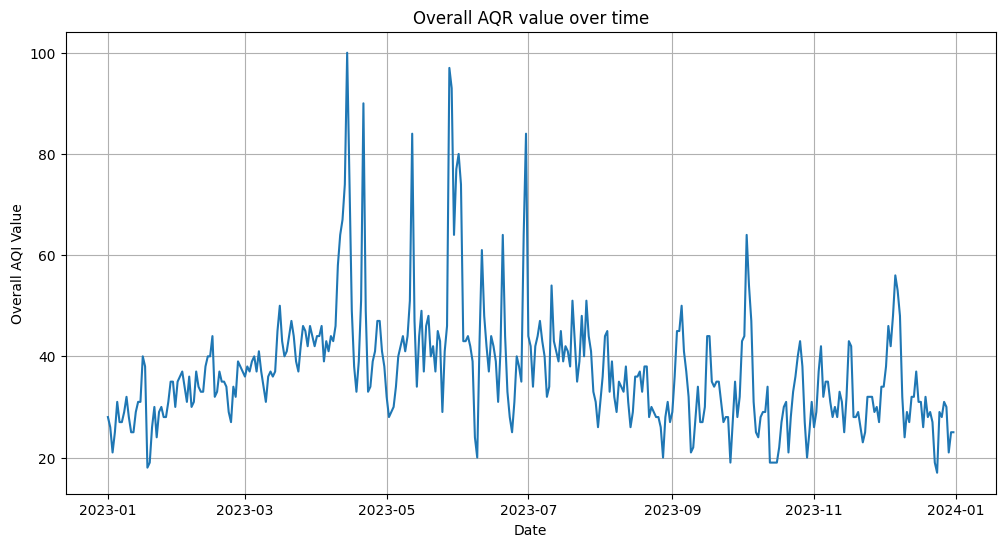

In [18]:
#Overall AQI value overtime
plt.figure(figsize=(12,6))   

sns.lineplot(data=df,x=df.index,y='Overall AQI Value')
plt.title('Overall AQR value over time')
plt.grid()

<BarContainer object of 6 artists>

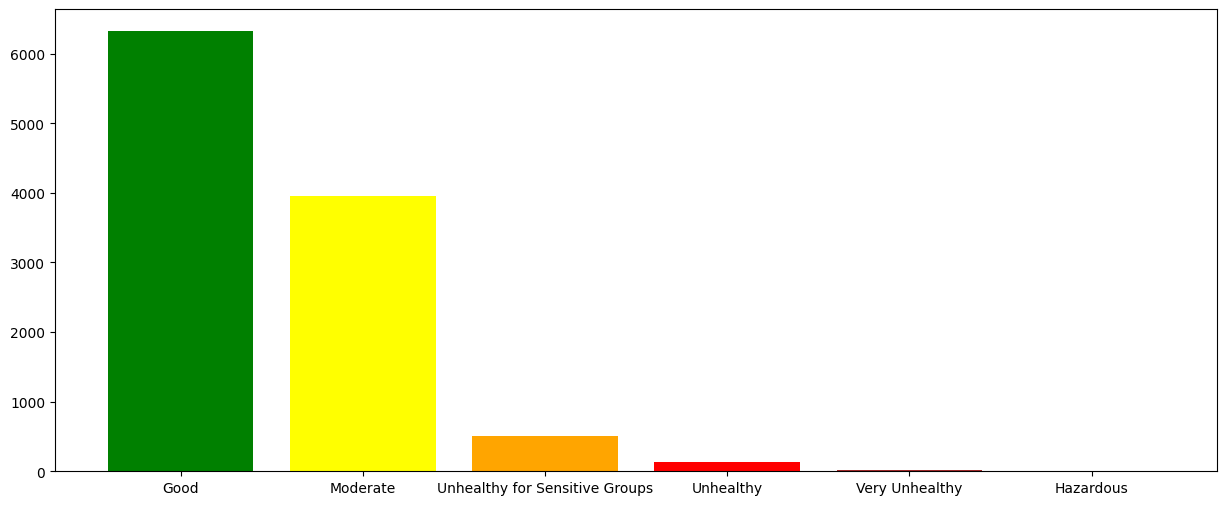

In [65]:
# AQI category distribution

plt.figure(figsize=(15,6))  
df1=pd.read_csv("aqidataset.csv")
df1['Date']=pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace=True)



AQIcategory=df1['AQI category'].value_counts()
colors=['Green','Yellow','Orange','Red','Brown','Black']
plt.bar(AQIcategory.index,AQIcategory.values, color=colors)

<BarContainer object of 5 artists>

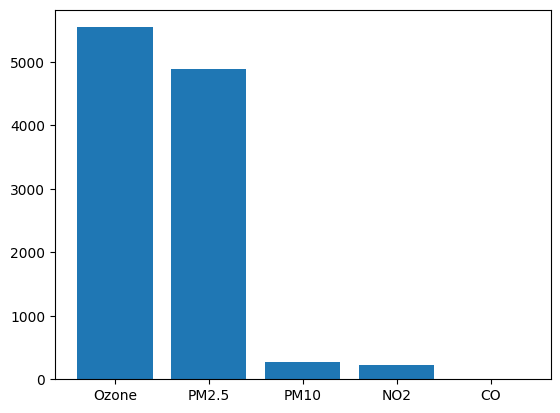

In [40]:
# Main Pollutant distribution

MPdist=df1['Main Pollutant'].value_counts()
plt.bar(MPdist.index, MPdist.values)

<AxesSubplot:xlabel='Overall AQI Value', ylabel='Count'>

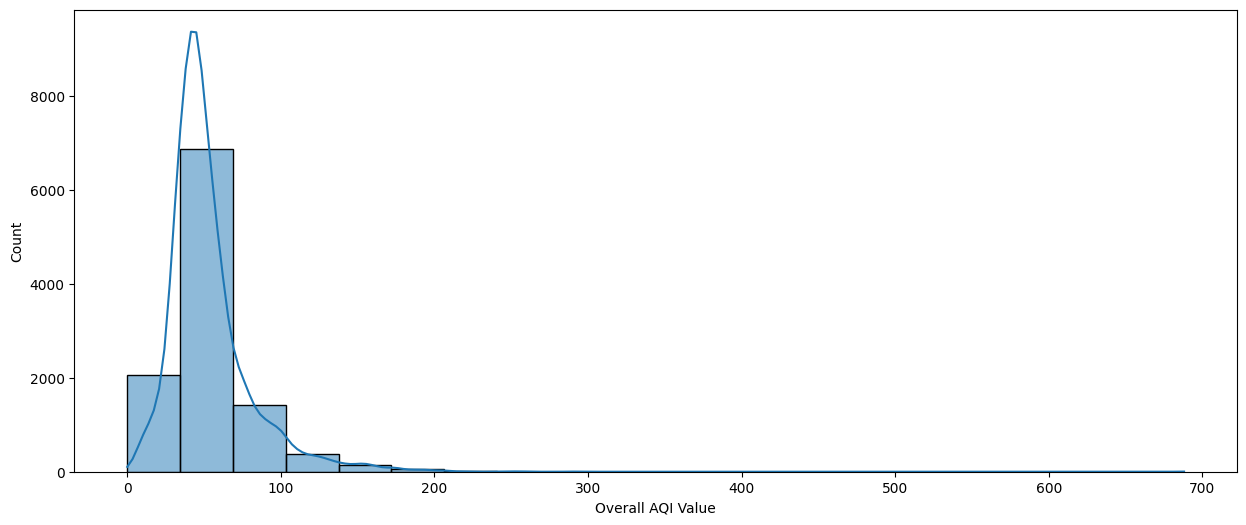

In [53]:
#Overall frequencies of AQI values
plt.figure(figsize=(15,6))  
sns.histplot(df1['Overall AQI Value'],bins=20,kde=True)

<AxesSubplot:xlabel='state', ylabel='Overall AQI Value'>

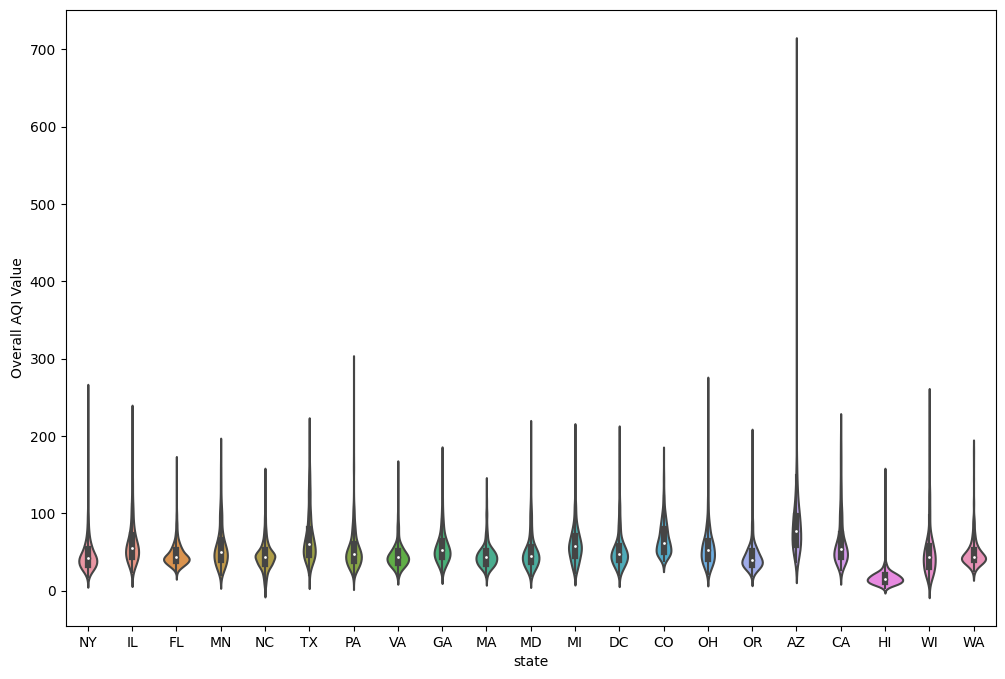

In [55]:
# Violin plot of AQI Values by State
plt.figure(figsize=(12, 8))
sns.violinplot(data=df1, x='state', y='Overall AQI Value')

<AxesSubplot:xlabel='city', ylabel='Overall AQI Value'>

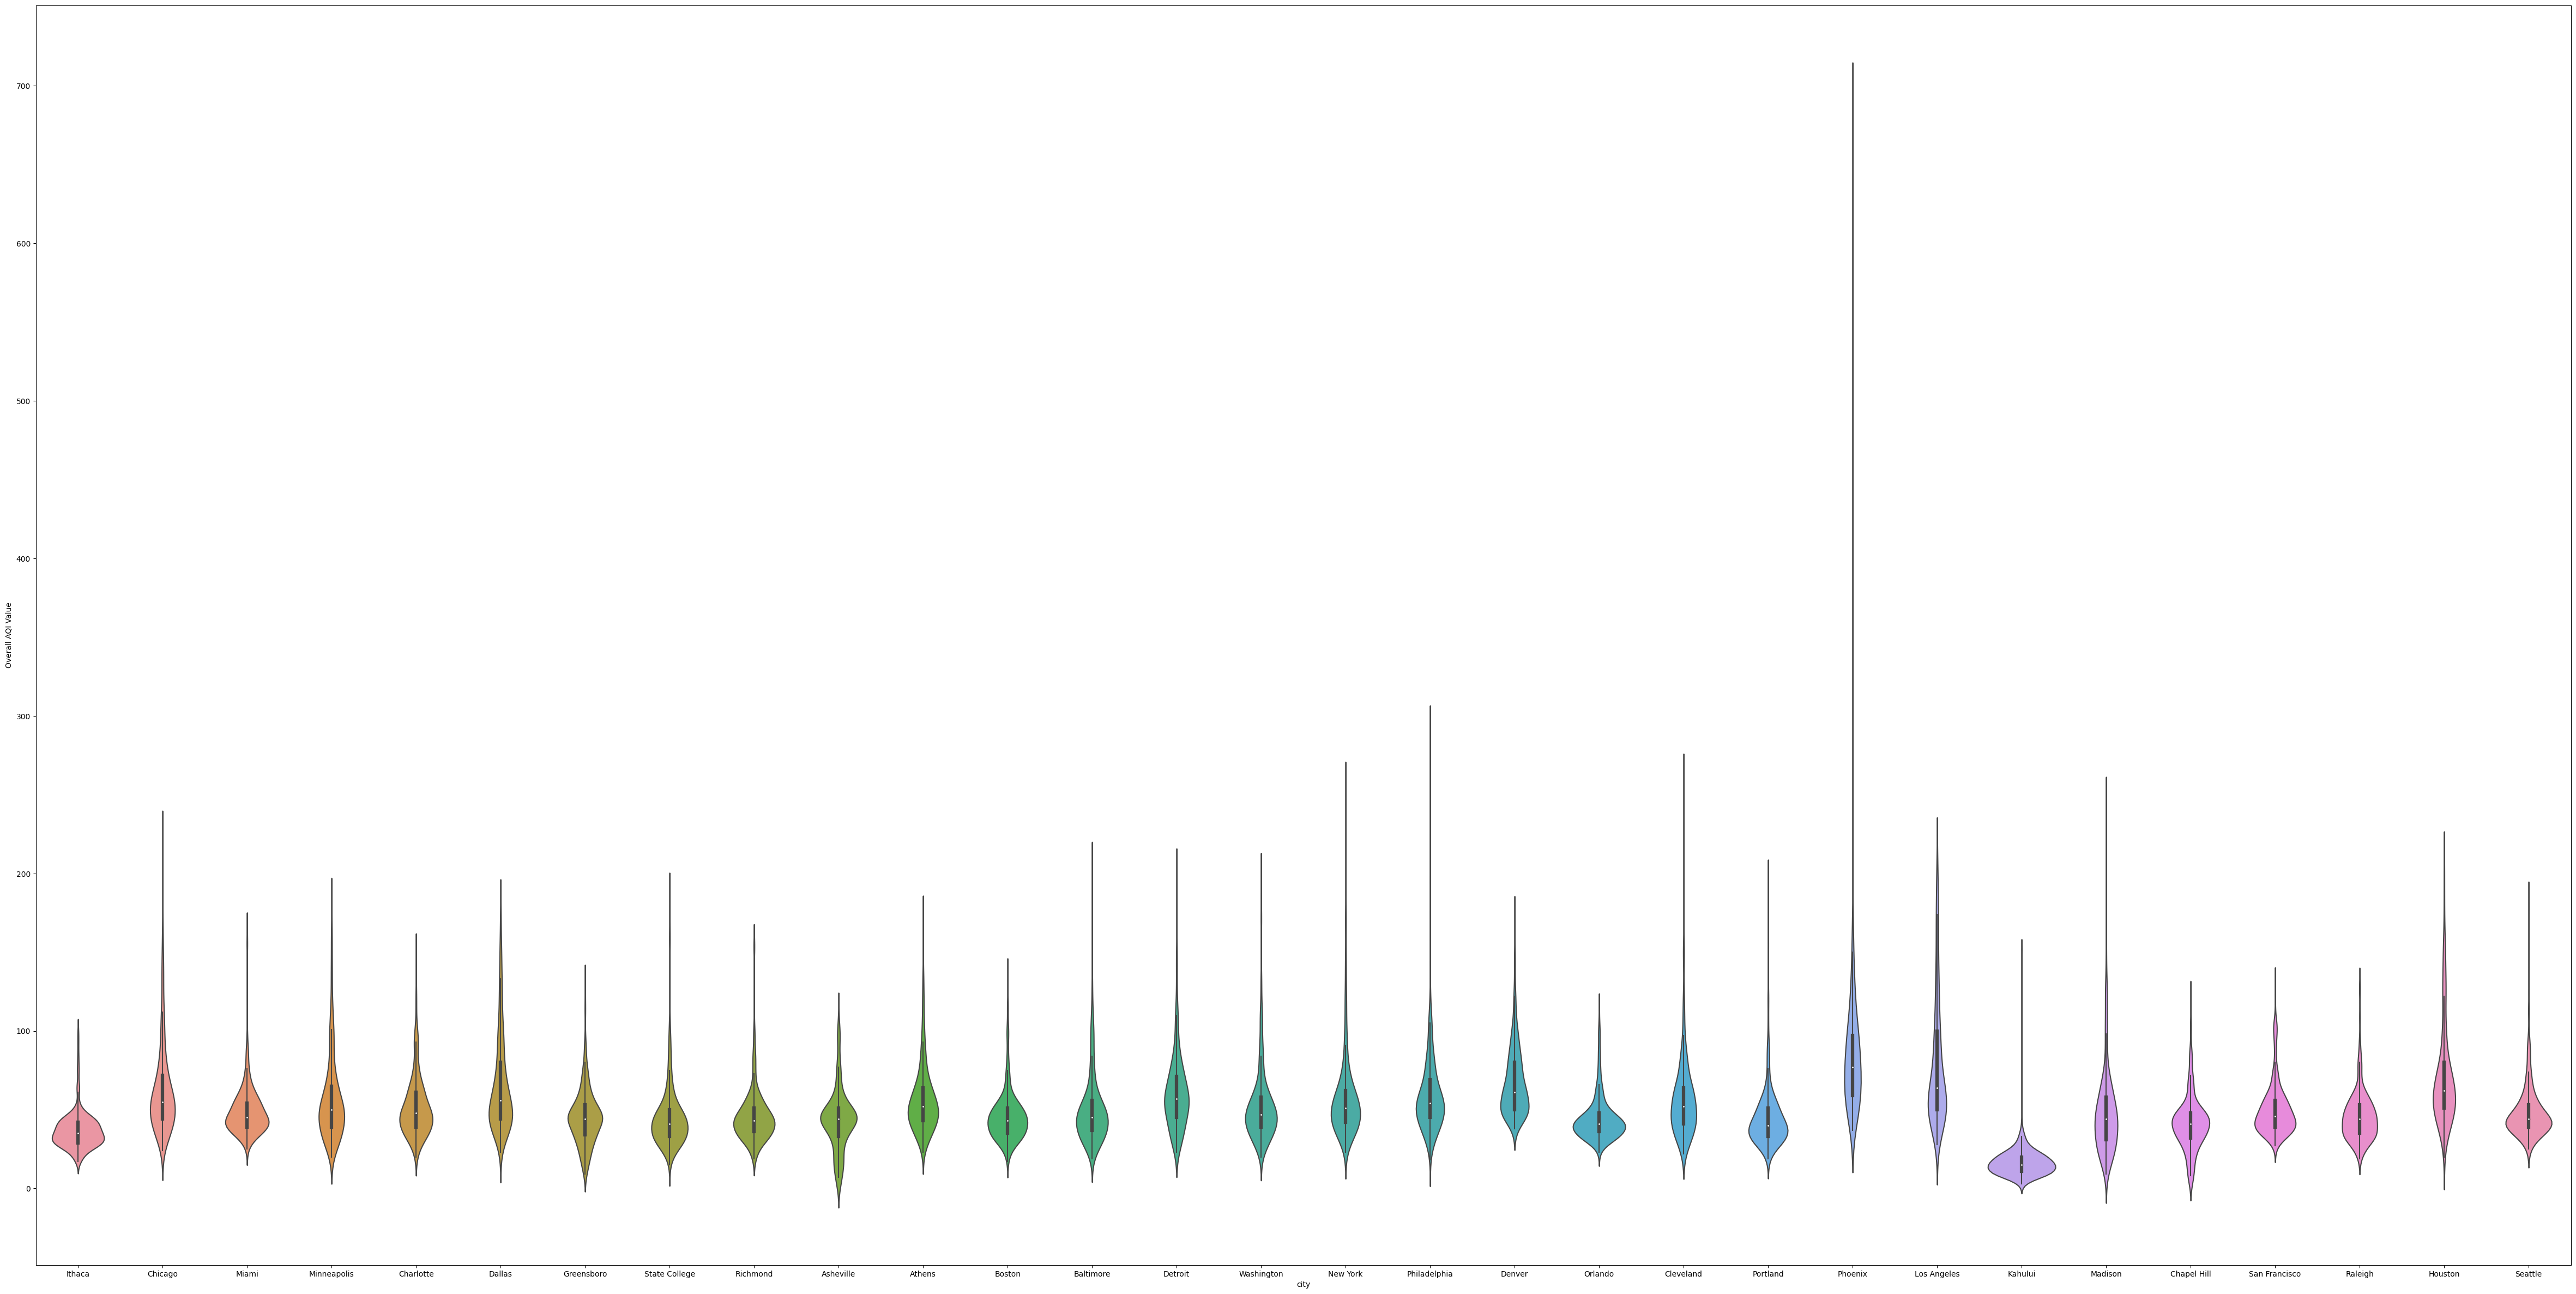

In [73]:
#AQI
plt.figure(figsize=(60, 30))
sns.violinplot(data=df1, x='city', y='Overall AQI Value')